In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from datetime import datetime, timedelta
import math
import random
from scipy.interpolate import make_interp_spline, BSpline

In [3]:
time_entries = pd.read_csv("TIME_Entry_Data_v4.csv", low_memory = False)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,AS_PROJECT_NAME,AS_PROJECT_ACTIVATION_DT,AS_PROJECT_COMPLETION_DT,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,...,RES_PL_LEVEL_8,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.West,...,CX Amer.Proactive.TTG.COE,2019-09-28,MS1:Project Kickoff>NSO_3,NaN,DATA CENTER,Data Center Orchestration and Automation,18.0,202009,2019-05-29,2020-02-28
1,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.West,...,CX Amer.Proactive.TTG.COE,2019-12-07,MS1:Project Kickoff>NSO_3,NaN,DATA CENTER,Data Center Orchestration and Automation,15.0,202019,2019-05-29,2020-02-28
2,884987,AS Subscription-USA,MSA Renewal - VzW NNO,2018-09-07,2019-06-28,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,...,NaN,2018-10-20,Ongoing Design Support.1_1,NaN,NaN,NaN,38.0,201912,2018-07-02,NaN
3,884993,AS Subscription-USA,Verizon:MSA Renewal - VzW SVS,2018-09-07,2019-08-23,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,...,CX GC.AMER.SVS,2018-07-21,Software Strategy,NaN,NaN,NaN,0.0,201851,2018-01-25,NaN
4,884993,AS Subscription-USA,Verizon:MSA Renewal - VzW SVS,2018-09-07,2019-08-23,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,...,CX GC.AMER.SVS,2018-08-25,Software Strategy,NaN,NaN,NaN,0.0,201904,2018-01-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162476,897892,AS Transaction - ITL,DHL CZFY19 BT ETO II_XL site,2019-02-22,2020-06-30,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.Germany.Proactive,CX EMEAR.Germany.Proactive.Delivery,...,CX EMEAR.SP.Architectures HQ,2020-05-23,LAN End User Site No. INT 361_1,NaN,Networking,Routing and Switching,0.0,202043,2019-02-21,NaN
1162477,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,...,CX Amer.Proactive.TTG.Non-COE,2019-12-07,PMO_AMO_1,NaN,SECURITY,NETWORK SECURITY,2.0,202019,2018-10-27,NaN
1162478,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,...,CX Amer.Proactive.TTG.Non-COE,2019-12-07,PMO_AMO_1,NaN,Networking,Wireless Networking,2.0,202019,2018-10-27,NaN
1162479,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,...,CX Amer.Proactive.TTG.Non-COE,2019-12-07,PMO_AMO_1,NaN,Networking,Routing and Switching,2.0,202019,2018-10-27,NaN


In [348]:
print(time_entries.columns)

Index(['SEGMENT1', 'AS_PROJECT_TYPE_CD', 'AS_PROJECT_NAME',
       'AS_PROJECT_ACTIVATION_DT', 'AS_PROJECT_COMPLETION_DT',
       'END_CUSTOMER_NAME', 'TRUE_DELIVERABLE', 'ACCOUNT_NAME',
       'PID_PL_LEVEL_6', 'PID_PL_LEVEL_7', 'PID_PL_LEVEL_8', 'PROJECT_ID',
       'EMAIL_ADDRESS', 'MEANING', 'RES_PL_LEVEL_6', 'RES_PL_LEVEL_7',
       'RES_PL_LEVEL_8', 'WEEK_END_DATE', 'DELIVERABLE', 'CHILD_SKU',
       'ARCHITECTURE', 'TECHNOLOGY', 'NO_OF_HRS', 'FISCAL_YEAR_WEEK_NUM_INT',
       'AS_TASK_ACTUAL_START_DT', 'AS_TASK_ACTUAL_FINISH_DT', 'TOTAL_HOURS',
       'PERCENT_PROJECT_HRS', 'DLV_START_DATE', 'LEAD_TIME',
       'EMPLOYEE_DLV_START_DATE', 'WEEK_SEQUENCE'],
      dtype='object')


In [388]:
# Total unique projects
print("Total unique projects:", len(time_entries["SEGMENT1"].unique()))

Total unique projects: 11484


In [386]:
# Total unique deliverables
print("Total unique deliverables:", len(time_entries["DELIVERABLE"].unique()))

Total unique deliverables: 11675


In [387]:
# Total unique deliverables (ungrouped)
print("Total unique deliverables (ungrouped):", len(time_entries["TRUE_DELIVERABLE"].unique()))

Total unique deliverables (ungrouped): 12787


In [4]:
# Changing this column value to be a datetime value in order to make calculations
time_entries["WEEK_END_DATE"] = pd.to_datetime(time_entries["WEEK_END_DATE"])

In [5]:
time_entries["AS_TASK_ACTUAL_FINISH_DT"] = pd.to_datetime(time_entries["AS_TASK_ACTUAL_FINISH_DT"])

In [6]:
time_entries["AS_TASK_ACTUAL_START_DT"] = pd.to_datetime(time_entries["AS_TASK_ACTUAL_START_DT"])

In [7]:
# Keeping track of the true deliverable values after cleaning the deliverable names and grouping them together
true_deliverable_values = time_entries["DELIVERABLE"]

In [8]:
# Making sure we have valid timecard entries
time_entries = time_entries[time_entries["NO_OF_HRS"] > 0]

In [389]:
time_entries["DELIVERABLE"].value_counts()

Project Management Support                   77732
Ongoing Design Support                       71424
Configuration and software change support    35269
Travel Time                                  21746
Services delivery management                 16991
                                             ...  
MS4 Migration Support_1                          1
WL-Develop Wireless NCD _5                       1
Software Recommendation Report GSR               1
IL-DM-Develop BOM_12                             1
Regression Testing 6.4 Functionality_4           1
Name: DELIVERABLE, Length: 11675, dtype: int64

In [ ]:
# -------------------------------------------- Data Cleaning (Regex) ------------------------------------------------

In [14]:
# Removing the .#_# format on the deliverable names to group deliverable names together
time_entries = time_entries.replace(".\d+_\d+", "", regex = True)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,AS_PROJECT_NAME,AS_PROJECT_ACTIVATION_DT,AS_PROJECT_COMPLETION_DT,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,...,RES_PL_LEVEL_8,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.West,...,CX Amer.Proactive.TTG.COE,2019-09-28,MS1:Project Kickoff>NSO_3,NaN,DATA CENTER,Data Center Orchestration and Automation,18.0,202009,2019-05-29,2020-02-28
1,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.West,...,CX Amer.Proactive.TTG.COE,2019-12-07,MS1:Project Kickoff>NSO_3,NaN,DATA CENTER,Data Center Orchestration and Automation,15.0,202019,2019-05-29,2020-02-28
2,884987,AS Subscription-USA,MSA Renewal - VzW NNO,2018-09-07,2019-06-28,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,...,NaN,2018-10-20,Ongoing Design Support,NaN,NaN,NaN,38.0,201912,2018-07-02,NaT
5,884999,AS Subscription-USA,Verizon:MSA Renewal - Vz VFN,2018-09-05,2019-06-30,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,...,AMER.ADN.ADC,2019-04-20,ACS / ISE Implementation Support,NaN,NaN,NaN,2.0,201938,2018-07-02,NaT
6,884989,AS Subscription-USA,Verizon:MSA Renewal - VzW MPN,2018-09-06,2019-09-06,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,...,GSP.AMER.ADN.ADC,2018-10-27,Configuration and software change support,NaN,SP MOBILITY,Mobility Policy and Access,6.5,201913,2018-07-02,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162475,885120,AS Subscription-USA,Optimizacion y mejora continua,2018-03-14,2019-03-31,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.LATAM,CX Amer.Proactive.LATAM.Mexico,...,NaN,2018-09-15,Type 1 Software Risk Analysis Report,NaN,SECURITY,Security Policy and Access,5.5,201907,2018-04-02,NaT
1162477,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,...,CX Amer.Proactive.TTG.Non-COE,2019-12-07,PMO_AMO_1,NaN,SECURITY,NETWORK SECURITY,2.0,202019,2018-10-27,NaT
1162478,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,...,CX Amer.Proactive.TTG.Non-COE,2019-12-07,PMO_AMO_1,NaN,Networking,Wireless Networking,2.0,202019,2018-10-27,NaT
1162479,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,...,CX Amer.Proactive.TTG.Non-COE,2019-12-07,PMO_AMO_1,NaN,Networking,Routing and Switching,2.0,202019,2018-10-27,NaT


In [15]:
# Inserting the pre-modified deliverable names to keep track of the true deliverable values
time_entries.insert(6, "TRUE_DELIVERABLE", true_deliverable_values)

In [16]:
# ------------------------------------------- DATASET CALCULATIONS --------------------------------------------------

In [17]:
#Creating a table that sums up all the hours recorded in each of the deliverables in all the projects
time_table = time_entries.groupby(["SEGMENT1", "DELIVERABLE"]).agg({"NO_OF_HRS": "sum"}).rename(columns = {"NO_OF_HRS": "TOTAL_HOURS"})
time_table

TOTAL_HOURS
SEGMENT1 DELIVERABLE                              
815501   Presales: IPAM Engineering         334.00
         Presales: Project Management       235.50
         Presales: Scoping                   49.75
825615   Presales: Cust Mtgs                  9.00
         Presales: HLD                      313.00
...                                            ...
951875   Post Implementation support        406.00
952174   Subject Matter Expert_1            143.00
A00806   Red Team, Phase                    265.00
A01777   Onboarding/Non Productive           22.00
         project related document_1          56.00

[56014 rows x 1 columns]

In [18]:
# Merging TOTAL_HOURS together with time_entries and calculating the percent project hours
time_entries = time_entries.merge(time_table, on = ["SEGMENT1", "DELIVERABLE"], how = "left")
time_entries["PERCENT_PROJECT_HRS"] = time_entries["NO_OF_HRS"] / time_entries["TOTAL_HOURS"]

In [22]:
# Calculating the earliest start time for each deliverable on a project
deliverable_start_dates = time_entries.groupby(["SEGMENT1", "TRUE_DELIVERABLE"]).agg({"WEEK_END_DATE": "min"}).rename(columns = {"WEEK_END_DATE": "DLV_START_DATE"})
deliverable_start_dates

DLV_START_DATE
SEGMENT1 TRUE_DELIVERABLE                              
815501   Presales: IPAM Engineering          2015-12-12
         Presales: Project Management        2015-12-12
         Presales: Scoping                   2015-12-12
825615   Presales: Cust Mtgs                 2016-11-26
         Presales: HLD                       2018-02-03
...                                                 ...
951875   Post Implementation support.1_1     2021-03-20
952174   Subject Matter Expert_1             2021-02-20
A00806   Red Team, Phase 1_1                 2021-03-13
A01777   Onboarding/Non Productive           2021-03-27
         project related document_1          2021-03-27

[58722 rows x 1 columns]

In [26]:
# Merging "DLV_START_DATE" with time_entries dataset
time_entries = time_entries.merge(deliverable_start_dates, on = ["SEGMENT1", "TRUE_DELIVERABLE"], how = "left")

In [28]:
# Calculating the lead time
time_entries["LEAD_TIME"] = (time_entries["DLV_START_DATE"] - time_entries["AS_TASK_ACTUAL_START_DT"]).dt.days

In [29]:
# Getting rid of null values in the start date column
time_entries["AS_TASK_ACTUAL_START_DT"].fillna(time_entries["DLV_START_DATE"], inplace = True)

In [30]:
(time_entries["AS_TASK_ACTUAL_START_DT"].isnull()).value_counts()

False    1102170
Name: AS_TASK_ACTUAL_START_DT, dtype: int64

In [31]:
# Calculating the earliest start date for an employee on a deliverable in a project
employee_start_dates = time_entries.groupby(["SEGMENT1", "DELIVERABLE", "EMAIL_ADDRESS"]).agg({"WEEK_END_DATE": "min"}).rename(columns = {"WEEK_END_DATE": "EMPLOYEE_DLV_START_DATE"})
employee_start_dates

EMPLOYEE_DLV_START_DATE
SEGMENT1 DELIVERABLE                  EMAIL_ADDRESS                        
815501   Presales: IPAM Engineering   ahedler                    2016-01-23
                                      jargraha                   2015-12-19
                                      markmars                   2016-03-12
                                      mouabdal                   2015-12-12
         Presales: Project Management shachris                   2015-12-12
...                                                                     ...
A00806   Red Team, Phase              jodiswan                   2021-03-20
A01777   Onboarding/Non Productive    tonishih                   2021-03-27
         project related document_1   aktosa                     2021-03-27
                                      iurikura                   2021-03-27
                                      johnsun                    2021-03-27

[133352 rows x 1 columns]

In [32]:
# Merging "EMPLOYEE_DLV_START_DATE" to time_entries table
time_entries = time_entries.merge(employee_start_dates, on = ["SEGMENT1", "DELIVERABLE", "EMAIL_ADDRESS"], how = "left")

In [33]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,AS_PROJECT_NAME,AS_PROJECT_ACTIVATION_DT,AS_PROJECT_COMPLETION_DT,END_CUSTOMER_NAME,TRUE_DELIVERABLE,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,...,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,LEAD_TIME,EMPLOYEE_DLV_START_DATE
0,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,MS1:Project Kickoff>NSO_3,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,Data Center Orchestration and Automation,18.0,202009,2019-05-29,2020-02-28,390.0,0.046154,2019-08-10,73.0,2019-08-10
1,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,MS1:Project Kickoff>NSO_3,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,Data Center Orchestration and Automation,15.0,202019,2019-05-29,2020-02-28,390.0,0.038462,2019-08-10,73.0,2019-08-10
2,884987,AS Subscription-USA,MSA Renewal - VzW NNO,2018-09-07,2019-06-28,NaN,Ongoing Design Support.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,...,NaN,38.0,201912,2018-07-02,NaT,20309.3,0.001871,2018-07-07,5.0,2018-07-07
3,884999,AS Subscription-USA,Verizon:MSA Renewal - Vz VFN,2018-09-05,2019-06-30,NaN,ACS / ISE Implementation Support,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,...,NaN,2.0,201938,2018-07-02,NaT,58.5,0.034188,2018-09-29,89.0,2018-09-29
4,884989,AS Subscription-USA,Verizon:MSA Renewal - VzW MPN,2018-09-06,2019-09-06,NaN,Configuration and software change support.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,...,Mobility Policy and Access,6.5,201913,2018-07-02,NaT,2713.5,0.002395,2018-07-07,5.0,2018-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102165,885120,AS Subscription-USA,Optimizacion y mejora continua,2018-03-14,2019-03-31,NaN,Type 1 Software Risk Analysis Report.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.LATAM,...,Security Policy and Access,5.5,201907,2018-04-02,NaT,617.0,0.008914,2018-04-14,12.0,2018-04-14
1102166,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,PMO_AMO_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,NETWORK SECURITY,2.0,202019,2018-10-27,NaT,4707.6,0.000425,2018-11-03,7.0,2018-11-03
1102167,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,PMO_AMO_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,Wireless Networking,2.0,202019,2018-10-27,NaT,4707.6,0.000425,2018-11-03,7.0,2018-11-03
1102168,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,PMO_AMO_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,Routing and Switching,2.0,202019,2018-10-27,NaT,4707.6,0.000425,2018-11-03,7.0,2018-11-03


In [34]:
# Calculating the week sequence of an employee per deliverable on a project (assigning a week number to their logged hours)
time_entries["WEEK_SEQUENCE"] = (time_entries["WEEK_END_DATE"] - time_entries["EMPLOYEE_DLV_START_DATE"]).dt.days // 7 + 1

In [35]:
# Checking to see if "WEEK_SEQUENCE" is calculated correctly
time_entries[(time_entries["SEGMENT1"] == "815501") & (time_entries["DELIVERABLE"] == "Presales: IPAM Engineering") & (time_entries["EMAIL_ADDRESS"] == "ahedler")][["WEEK_END_DATE", "EMPLOYEE_DLV_START_DATE", "WEEK_SEQUENCE"]]

,WEEK_END_DATE,EMPLOYEE_DLV_START_DATE,WEEK_SEQUENCE
30160,2016-01-23,2016-01-23,1
232206,2016-02-06,2016-01-23,3
232207,2016-05-07,2016-01-23,16
232208,2016-03-12,2016-01-23,8
311168,2016-03-05,2016-01-23,7
311169,2016-04-30,2016-01-23,15
461941,2016-04-16,2016-01-23,13
574987,2016-04-09,2016-01-23,12
621063,2016-03-26,2016-01-23,10
621064,2016-04-23,2016-01-23,14


In [37]:
# ----------------------------------------- CLUSTERING ANALYSIS BEGINS ---------------------------------------------

PART 1

1) Create a function that plots the distribution of the count of projects for a certain deliverable and their total amount of hours spent across all projects (take the max of every deliverable length in a project and plot the counts of deliverable lengths)

In [38]:
# Calculating the total length of each deliverable in all projects
dlv_week_lengths = time_entries.groupby(["SEGMENT1", "DELIVERABLE"]).agg({"WEEK_SEQUENCE": max}).rename(columns = {"WEEK_SEQUENCE": "TOTAL_DLV_LENGTH"}).reset_index()
dlv_week_lengths

,SEGMENT1,DELIVERABLE,TOTAL_DLV_LENGTH
0,815501,Presales: IPAM Engineering,33
1,815501,Presales: Project Management,34
2,815501,Presales: Scoping,32
3,825615,Presales: Cust Mtgs,56
4,825615,Presales: HLD,9
...,...,...,...
56009,951875,Post Implementation support,7
56010,952174,Subject Matter Expert_1,5
56011,A00806,"Red Team, Phase",3
56012,A01777,Onboarding/Non Productive,2


In [39]:
# Check to see if rows were aggregated correctly
print("Number of projects with Ongoing Design Support:", len(time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"].groupby("SEGMENT1")))

Number of projects with Ongoing Design Support: 1188


In [40]:
# Scratch work
ongoing_design_support_length = dlv_week_lengths[dlv_week_lengths["DELIVERABLE"] == "Ongoing Design Support"]
ongoing_design_support_length

,SEGMENT1,DELIVERABLE,TOTAL_DLV_LENGTH
169,853472,Ongoing Design Support,44
266,857114,Ongoing Design Support,25
271,857429,Ongoing Design Support,23
368,863029,Ongoing Design Support,27
467,865198,Ongoing Design Support,30
...,...,...,...
55931,948019,Ongoing Design Support,3
55937,948042,Ongoing Design Support,1
55972,948957,Ongoing Design Support,8
55995,950653,Ongoing Design Support,11


In [41]:
# Scratch work
time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"]["TRUE_DELIVERABLE"].value_counts()

Ongoing Design Support.1_1        59856
Ongoing Design Support.2_2         4535
Ongoing Design Support.3_3         1205
Ongoing Design Support.4_4         1092
Ongoing Design Support.10_10       1020
Ongoing Design Support              814
Ongoing Design Support.7_7          508
Ongoing Design Support.9_9          300
Ongoing Design Support.5_5          263
Ongoing Design Support.73_73        222
Ongoing Design Support.6_6          196
Ongoing Design Support.11_11        179
Ongoing Design Support.8_8          173
Ongoing Design Support.1_2          153
Ongoing Design Support.15_15        143
Ongoing Design Support.12_12        126
Ongoing Design Support.10_21         86
Ongoing Design Support.11_27         51
Ongoing Design Support.20_20         50
Ongoing Design Support.18_57         46
Ongoing Design Support.7_23          43
Ongoing Design Support.13_44         40
Ongoing Design Support.13_13         38
Ongoing Design Support.15_31         27
Ongoing Design Support.12_22         23


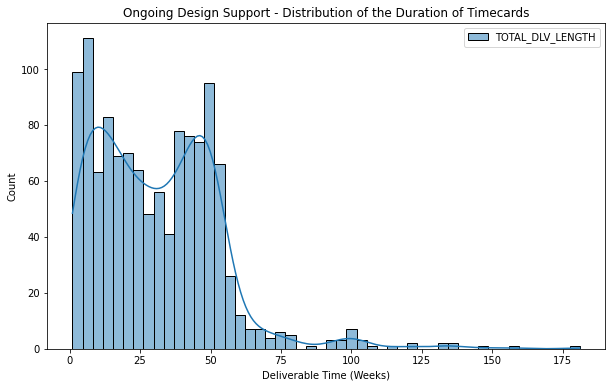

In [42]:
# Scratch work
dimensions = (10, 6)
fig, ax = plt.subplots(figsize = dimensions)
sns.histplot(ongoing_design_support_length, stat = "count", bins = 50, kde = True)
plt.xlabel("Deliverable Time (Weeks)")
plt.title("Ongoing Design Support - Distribution of the Duration of Timecards");

In [43]:
# Plots the distribution of the total timecard duration for all instances of a deliverable
# Count represents the amount of projects that have total length equivalent to that certain number of weeks
def density_plot(data, deliverable):
    dimensions = (10, 6)
    fig, ax = plt.subplots(figsize = dimensions)
    dlv_table = data[data["DELIVERABLE"] == deliverable]
    sns.histplot(dlv_table, stat = "count", bins = 50, kde = True)
    plt.xlabel("Deliverable Time (Weeks)")
    plt.title(deliverable + " - Distribution of the Total Durations of Timecards")

In [44]:
# Generates a boxplot of the total timecard duration for all instances of a deliverable
def box_plot(data, deliverable):
    dimensions = (10, 6)
    fig, ax = plt.subplots(figsize = dimensions)
    dlv_table = data[data["DELIVERABLE"] == deliverable]
    sns.boxplot(data = dlv_table, x = "TOTAL_DLV_LENGTH")
    plt.xlabel("Deliverable Time (Weeks)")
    plt.title(deliverable + " - Boxplot of the Total Durations of Timecards")

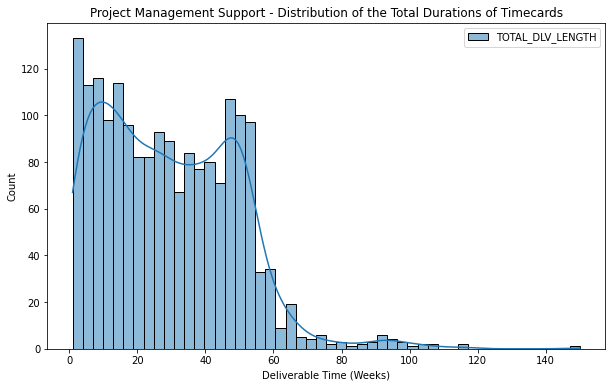

In [45]:
density_plot(dlv_week_lengths, "Project Management Support")

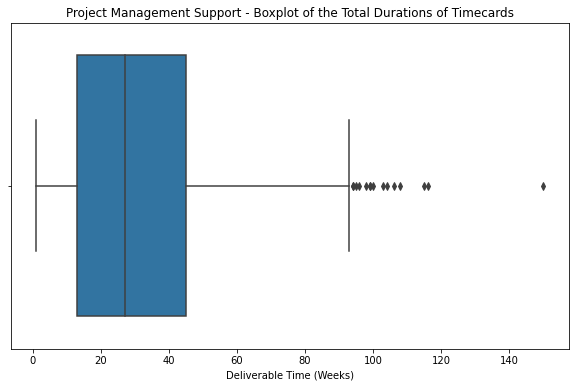

In [46]:
box_plot(dlv_week_lengths, "Project Management Support")

PART 2

1) Remove projects which have more than 20% missing weeks from the total number of weeks for a certain deliverable <br>
2) Plot smoothed lineplot with normal lineplot for the top 5 deliverables for weeks 30, 40, and 50 and randomly select projects

In [47]:
# ------------------------------------- TASK #1 (Removing 20%) --------------------------------------------

In [48]:
time_entries_thin = time_entries.copy()
time_entries_thin

,SEGMENT1,AS_PROJECT_TYPE_CD,AS_PROJECT_NAME,AS_PROJECT_ACTIVATION_DT,AS_PROJECT_COMPLETION_DT,END_CUSTOMER_NAME,TRUE_DELIVERABLE,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,...,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,LEAD_TIME,EMPLOYEE_DLV_START_DATE,WEEK_SEQUENCE
0,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,MS1:Project Kickoff>NSO_3,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,18.0,202009,2019-05-29,2020-02-28,390.0,0.046154,2019-08-10,73.0,2019-08-10,8
1,913491,AS Transaction - USA,Expedia ECOM Automation PDI,2019-04-29,2020-09-18,NaN,MS1:Project Kickoff>NSO_3,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,15.0,202019,2019-05-29,2020-02-28,390.0,0.038462,2019-08-10,73.0,2019-08-10,18
2,884987,AS Subscription-USA,MSA Renewal - VzW NNO,2018-09-07,2019-06-28,NaN,Ongoing Design Support.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,...,38.0,201912,2018-07-02,NaT,20309.3,0.001871,2018-07-07,5.0,2018-07-07,16
3,884999,AS Subscription-USA,Verizon:MSA Renewal - Vz VFN,2018-09-05,2019-06-30,NaN,ACS / ISE Implementation Support,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,...,2.0,201938,2018-07-02,NaT,58.5,0.034188,2018-09-29,89.0,2018-09-29,30
4,884989,AS Subscription-USA,Verizon:MSA Renewal - VzW MPN,2018-09-06,2019-09-06,NaN,Configuration and software change support.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,...,6.5,201913,2018-07-02,NaT,2713.5,0.002395,2018-07-07,5.0,2018-09-01,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102165,885120,AS Subscription-USA,Optimizacion y mejora continua,2018-03-14,2019-03-31,NaN,Type 1 Software Risk Analysis Report.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.LATAM,...,5.5,201907,2018-04-02,NaT,617.0,0.008914,2018-04-14,12.0,2018-04-14,23
1102166,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,PMO_AMO_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,2.0,202019,2018-10-27,NaT,4707.6,0.000425,2018-11-03,7.0,2018-11-03,58
1102167,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,PMO_AMO_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,2.0,202019,2018-10-27,NaT,4707.6,0.000425,2018-11-03,7.0,2018-11-03,58
1102168,894763,AS Transaction - CAN,KPMG Canada,2018-10-30,2021-02-26,NaN,PMO_AMO_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,2.0,202019,2018-10-27,NaT,4707.6,0.000425,2018-11-03,7.0,2018-11-03,58


In [49]:
# Create a dataset that contains the count of unique weeks that were recorded with hours per deliverable in a project ("UNIQUE_WEEK_ENTRIES") and the total number of weeks the deliverable lasted
project_week_lengths = time_entries_thin.groupby(["SEGMENT1", "DELIVERABLE"]).agg({"WEEK_SEQUENCE": "nunique"}).rename(columns = {"WEEK_SEQUENCE": "UNIQUE_WEEK_ENTRIES"}).merge(dlv_week_lengths, on = ["SEGMENT1", "DELIVERABLE"], how = "left")
project_week_lengths

# We have multiple deliverables for project, so we can only do this analysis for a certain deliverable

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
0,815501,Presales: IPAM Engineering,33,33
1,815501,Presales: Project Management,33,34
2,815501,Presales: Scoping,31,32
3,825615,Presales: Cust Mtgs,2,56
4,825615,Presales: HLD,9,9
...,...,...,...,...
56009,951875,Post Implementation support,7,7
56010,952174,Subject Matter Expert_1,5,5
56011,A00806,"Red Team, Phase",3,3
56012,A01777,Onboarding/Non Productive,2,2


In [50]:
# Scratch work
ongoing_design_support_length = project_week_lengths[project_week_lengths["DELIVERABLE"] == "Ongoing Design Support"]
ongoing_design_support_length

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
169,853472,Ongoing Design Support,39,44
266,857114,Ongoing Design Support,24,25
271,857429,Ongoing Design Support,13,23
368,863029,Ongoing Design Support,27,27
467,865198,Ongoing Design Support,29,30
...,...,...,...,...
55931,948019,Ongoing Design Support,3,3
55937,948042,Ongoing Design Support,1,1
55972,948957,Ongoing Design Support,8,8
55995,950653,Ongoing Design Support,11,11


In [51]:
(ongoing_design_support_length["UNIQUE_WEEK_ENTRIES"] >= np.floor(ongoing_design_support_length["TOTAL_DLV_LENGTH"] * 0.8)).value_counts()

True     875
False    313
dtype: int64

In [52]:
ongoing_design_support_length = ongoing_design_support_length[ongoing_design_support_length["UNIQUE_WEEK_ENTRIES"] >= np.floor(ongoing_design_support_length["TOTAL_DLV_LENGTH"] * 0.8)]
ongoing_design_support_length

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
169,853472,Ongoing Design Support,39,44
266,857114,Ongoing Design Support,24,25
368,863029,Ongoing Design Support,27,27
467,865198,Ongoing Design Support,29,30
822,869649,Ongoing Design Support,48,48
...,...,...,...,...
55931,948019,Ongoing Design Support,3,3
55937,948042,Ongoing Design Support,1,1
55972,948957,Ongoing Design Support,8,8
55995,950653,Ongoing Design Support,11,11


In [53]:
# Gives us valid project ID's with a specific length and chosen deliverable that have no more than 20% missing weeks
def deliverable_thinned_table(data, deliverable, dlv_length):
    dlv_table = data[data["DELIVERABLE"] == deliverable]
    dlv_table = dlv_table[dlv_table["UNIQUE_WEEK_ENTRIES"] >= np.floor(dlv_table["TOTAL_DLV_LENGTH"] * 0.8)]
    dlv_table = dlv_table[dlv_table["TOTAL_DLV_LENGTH"] == dlv_length]
    return dlv_table

In [229]:
# Gives us all valid project ID's with the chosen deliverable that have no more than 20% missing weeks
def deliverable_thinned(data, deliverable):
    dlv_table = data[data["DELIVERABLE"] == deliverable]
    dlv_table = dlv_table[dlv_table["UNIQUE_WEEK_ENTRIES"] >= np.floor(dlv_table["TOTAL_DLV_LENGTH"] * 0.8)]
    return dlv_table

In [54]:
# CHECK TO SEE IF THE RIGHT DELIVERABLES ARE CONTAINED IN THE TABLE
(deliverable_thinned_table(project_week_lengths, "Project Management Support", 30)["SEGMENT1"] == "938670").value_counts()

False    27
True      1
Name: SEGMENT1, dtype: int64

In [55]:
deliverable_thinned_table(project_week_lengths, "Project Management Support", 30)

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
369,863029,Project Management Support,30,30
468,865198,Project Management Support,30,30
825,869649,Project Management Support,30,30
10528,886992,Project Management Support,25,30
12118,888450,Project Management Support,30,30
12671,889025,Project Management Support,29,30
17026,892394,Project Management Support,30,30
17433,892887,Project Management Support,29,30
21361,895527,Project Management Support,28,30
23855,897736,Project Management Support,29,30


In [56]:
# --------------------------------------- TASK #2 (Smoothed Lineplot) --------------------------------------------

In [57]:
# Scratch work
proj_mgt_supp_hrs = time_entries[(time_entries["SEGMENT1"] == "921388") & (time_entries["DELIVERABLE"] == "Project Management Support")][["WEEK_SEQUENCE", "NO_OF_HRS"]].groupby("WEEK_SEQUENCE").sum().reset_index()
proj_mgt_supp_hrs

,WEEK_SEQUENCE,NO_OF_HRS
0,1,5.0
1,4,4.5
2,6,4.0
3,7,5.0
4,8,6.0
5,9,4.0
6,10,6.0
7,11,6.0
8,12,6.0
9,13,6.0


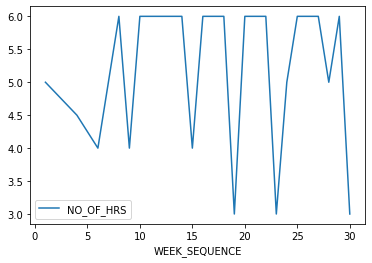

In [58]:
# Scratch work
proj_mgt_supp_hrs.plot.line(x = 'WEEK_SEQUENCE', y = 'NO_OF_HRS');

In [59]:
# Plotting a regular lineplot and fitted curve for the total number of hours recorded over the entire duration of a deliverable and project
def lineplot(deliverable, project_id, k):
    dlv_hrs = time_entries[(time_entries["SEGMENT1"] == project_id) & (time_entries["DELIVERABLE"] == deliverable)][["WEEK_SEQUENCE", "NO_OF_HRS"]].groupby("WEEK_SEQUENCE").sum().reset_index()
    weeks = np.array(dlv_hrs["WEEK_SEQUENCE"])
    hours = np.array(dlv_hrs["NO_OF_HRS"])
    xnew = np.linspace(weeks.min(), weeks.max(), 300)
    spl = make_interp_spline(weeks, hours, k = k)
    power_smooth = spl(xnew)
    dlv_hrs.plot.line(x = "WEEK_SEQUENCE", y = "NO_OF_HRS");
    plt.plot(xnew, power_smooth)
    plt.xlabel("Deliverable Sequence (Weeks)")
    plt.ylabel("Total Time Spent (Hours)")
    plt.title(deliverable + " - Line Plot of the Total Duration of Timecards Per Week");

In [60]:
# Same as the above function, but randomly generates a lineplot and smoothed lineplot from a valid project with the chosen deliverable 
def random_lineplot(deliverable, dlv_length):
    dlv_thinned_table = deliverable_thinned_table(project_week_lengths, deliverable, dlv_length)
    dlv_id = np.array(dlv_thinned_table["SEGMENT1"])
    random_project_id = random.choice(dlv_id)
    dlv_hrs = time_entries[(time_entries["SEGMENT1"] == random_project_id) & (time_entries["DELIVERABLE"] == deliverable)][["WEEK_SEQUENCE", "NO_OF_HRS"]].groupby("WEEK_SEQUENCE").sum().reset_index()
    weeks = np.array(dlv_hrs["WEEK_SEQUENCE"])
    hours = np.array(dlv_hrs["NO_OF_HRS"])
    xnew = np.linspace(weeks.min(), weeks.max(), 300)
    spl = make_interp_spline(weeks, hours, k = 3)
    power_smooth = spl(xnew)
    dlv_hrs.plot.line(x = "WEEK_SEQUENCE", y = "NO_OF_HRS")
    plt.plot(xnew, power_smooth)
    plt.xlabel("Deliverable Sequence (Weeks)")
    plt.ylabel("Total Time Spent (Hours)")
    plt.title(deliverable + " - Line Plot of the Total Duration of Timecards Per Week");
    print("SEGMENT1:", random_project_id)

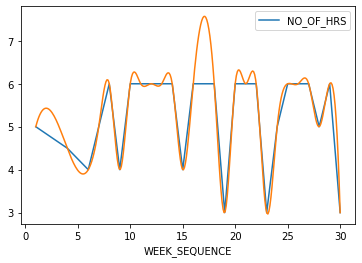

In [61]:
# Scratch work
T = np.array(proj_mgt_supp_hrs["WEEK_SEQUENCE"])
power = np.array(proj_mgt_supp_hrs["NO_OF_HRS"])
xnew = np.linspace(T.min(), T.max(), 300)
spl = make_interp_spline(T, power, k = 3)
power_smooth = spl(xnew)
proj_mgt_supp_hrs.plot.line(x = 'WEEK_SEQUENCE', y = 'NO_OF_HRS');
plt.plot(xnew, power_smooth);

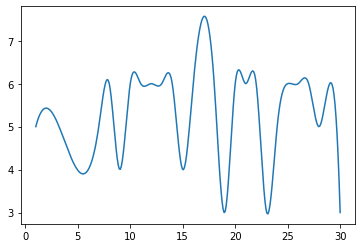

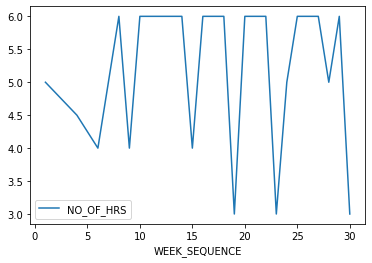

In [62]:
# Scratch work
plt.plot(xnew, power_smooth);
proj_mgt_supp_hrs.plot.line(x = 'WEEK_SEQUENCE', y = 'NO_OF_HRS');

In [63]:
# Scratch work
time_entries["DELIVERABLE"].value_counts()[:100].index

Index(['Project Management Support', 'Ongoing Design Support',
       'Configuration and software change support', 'Travel Time',
       'Services delivery management', 'Presales: Scoping',
       'Ongoing Service and Project Management Support',
       'Design Change Support', 'Project Managemt Analyze_1',
       'Data Low Analyze_1', 'Design Review', 'Design Support',
       'Foundation Onsite Consulting', 'Program Management',
       'Escalation Engineering Support', 'Ongoing Flexible Support',
       'IMPLEMENTATION_1', 'Presales: Cust Mtgs', 'Lab services_1',
       'Data Medium Analyze_1',
       'Type 1 Software Analysis & Release Standards Report',
       'Knowledge Transfer Session',
       'Type 2 Std Portal Feature SW Analysis & Release Standards',
       'Security Network Consulting Support (Qty 1 = 1 week)', 'Design_1',
       'Type 2 Audit', 'SME_1', 'Exception Task', 'Implementation support',
       'NCE_1', 'Implementation Execution_1', 'IMPLEMENTATION SUPPORT_1',
     

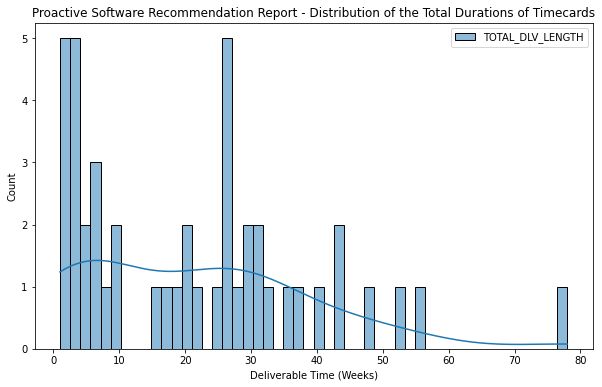

In [64]:
# Scratch work
density_plot(dlv_week_lengths, "Proactive Software Recommendation Report")

In [65]:
# Scratch work
time_entries[time_entries["DELIVERABLE"] == "Proactive Software Recommendation Report"]

,SEGMENT1,AS_PROJECT_TYPE_CD,AS_PROJECT_NAME,AS_PROJECT_ACTIVATION_DT,AS_PROJECT_COMPLETION_DT,END_CUSTOMER_NAME,TRUE_DELIVERABLE,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,...,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,LEAD_TIME,EMPLOYEE_DLV_START_DATE,WEEK_SEQUENCE
647,880864,AS Subscription-UKH,NOS CY18,2018-01-08,2018-11-19,NaN,Proactive Software Recommendation Report.1_1,NaN,CX EMEAR.Proactive,CX EMEAR.Germany.Proactive,...,6.0,201844,2018-01-01,NaT,1692.00,0.003546,2018-01-06,5.0,2018-01-20,20
1342,885536,AS Subscription-USA,FedEx :FY18 Maintenance Renewa,2018-04-18,2019-04-30,NaN,Proactive Software Recommendation Report.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,24.0,201906,2018-05-01,NaT,808.00,0.029703,2018-05-05,4.0,2018-05-05,19
1947,897760,AS Subscription - BV,CS SK Hynix consulting service,2018-07-26,2018-12-31,NaN,Proactive Software Recommendation Report.1_1,NaN,CX APJC.Proactive,CX APJC.Proactive.Korea,...,16.0,201909,2018-08-01,NaT,881.00,0.018161,2018-09-01,31.0,2018-09-01,5
2103,887007,AS Subscription-USA,Dropbox_Corp_BCS_RS&DC,2018-07-26,2019-07-31,NaN,Proactive Software Recommendation Report.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,...,8.0,201926,2018-02-21,NaT,143.00,0.055944,2018-08-25,185.0,2018-08-25,23
3356,878245,AS Subscription-USA,"Discover AS Renewal: BN, NAD,",2018-01-12,2021-02-02,NaN,Proactive Software Recommendation Report.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,5.0,201825,2017-12-01,NaT,1796.25,0.002784,2018-01-06,36.0,2018-01-13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099405,878245,AS Subscription-USA,"Discover AS Renewal: BN, NAD,",2018-01-12,2021-02-02,NaN,Proactive Software Recommendation Report.1_1,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,26.0,202115,2017-12-01,NaT,1796.25,0.014475,2018-01-06,36.0,2020-10-17,4
1099997,897760,AS Subscription - BV,CS SK Hynix consulting service,2018-07-26,2018-12-31,NaN,Proactive Software Recommendation Report.2_2,NaN,CX APJC.Proactive,CX APJC.Proactive.Korea,...,4.0,201908,2018-08-01,NaT,881.00,0.004540,2018-09-08,38.0,2018-09-15,2
1100282,880864,AS Subscription-UKH,NOS CY18,2018-01-08,2018-11-19,NaN,Proactive Software Recommendation Report.1_1,NaN,CX EMEAR.Proactive,CX EMEAR.Germany.Proactive,...,2.0,201847,2018-01-01,NaT,1692.00,0.001182,2018-01-06,5.0,2018-06-16,2
1101312,889655,AS Subscription-USA,Shire: Baxalta CS SMARTnet,2018-06-07,2019-01-02,NaN,Proactive Software Recommendation Report,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,...,5.0,201916,2018-06-04,NaT,188.00,0.026596,2018-09-01,89.0,2018-11-17,1


SEGMENT1: 881884


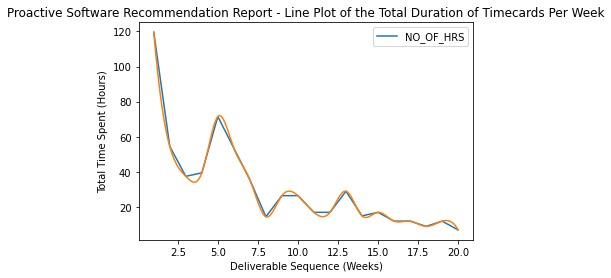

In [66]:
# Scratch work
random_lineplot("Proactive Software Recommendation Report", 20)

SEGMENT1: 915901


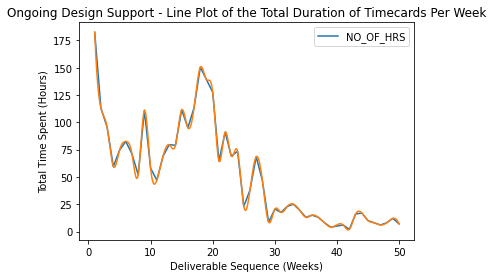

In [67]:
# Scratch work
random_lineplot("Ongoing Design Support", 50)

PART 3 <br>
1) Create a function that fits a Gaussian curve onto the line plots

In [68]:
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq

In [69]:
# Scratch work
proj_mgt_supp_hrs

,WEEK_SEQUENCE,NO_OF_HRS
0,1,5.0
1,4,4.5
2,6,4.0
3,7,5.0
4,8,6.0
5,9,4.0
6,10,6.0
7,11,6.0
8,12,6.0
9,13,6.0


In [70]:
# Scratch work
fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]

In [71]:
# Scratch work
errfunc  = lambda p, x, y: (y - fitfunc(p, x))

In [72]:
# Scratch work
xdata = proj_mgt_supp_hrs["WEEK_SEQUENCE"]
xdata

0      1
1      4
2      6
3      7
4      8
5      9
6     10
7     11
8     12
9     13
10    14
11    15
12    16
13    18
14    19
15    20
16    21
17    22
18    23
19    24
20    25
21    26
22    27
23    28
24    29
25    30
Name: WEEK_SEQUENCE, dtype: int64

In [73]:
# Scratch work
ydata = proj_mgt_supp_hrs["NO_OF_HRS"]
ydata

0     5.0
1     4.5
2     4.0
3     5.0
4     6.0
5     4.0
6     6.0
7     6.0
8     6.0
9     6.0
10    6.0
11    4.0
12    6.0
13    6.0
14    3.0
15    6.0
16    6.0
17    6.0
18    3.0
19    5.0
20    6.0
21    6.0
22    6.0
23    5.0
24    6.0
25    3.0
Name: NO_OF_HRS, dtype: float64

In [74]:
# Scratch work
init = [1.0, 0.5, 0.5, 0.5]

In [75]:
# Scratch work
out = leastsq(errfunc, init, args = (xdata, ydata))
out

(array([ 94.27097209, -40.21110349,   3.36556957,   5.21153846]), 3)

In [76]:
# Scratch work
c = out[0]
c

array([ 94.27097209, -40.21110349,   3.36556957,   5.21153846])

In [77]:
print("A exp[-0.5((x-mu)/sigma)^2] + k ")
print("Parent Coefficients:")
print("1.000, 0.200, 0.300, 0.625")
print("Fit Coefficients:")
print(c[0],c[1],abs(c[2]),c[3])

A exp[-0.5((x-mu)/sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
94.27097208592626 -40.211103486444756 3.3655695693262135 5.211538461539471


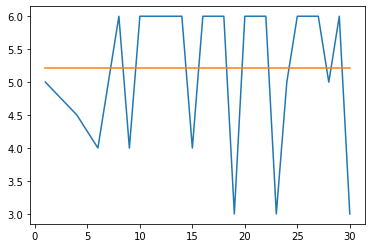

In [78]:
# Scratch work
plot(xdata, ydata)
plot(xdata, fitfunc(c, xdata))

In [79]:
# Fitting a Gaussian curve onto our lineplots (first version)
def gaussian_fit(deliverable, project_id, k):
    dlv_table = time_entries[(time_entries["SEGMENT1"] == project_id) & (time_entries["DELIVERABLE"] == deliverable)][["WEEK_SEQUENCE", "NO_OF_HRS"]].groupby("WEEK_SEQUENCE").sum().reset_index()
    xdata = dlv_table["WEEK_SEQUENCE"]
    ydata = dlv_table["NO_OF_HRS"]
    fitfunc = lambda p, x: p[0] * exp(-0.5 * ((x-p[1]) / p[2])**k) + p[3]
    errfunc = lambda p, x, y: (y - fitfunc(p, x))
    init = [1.0, 0.5, 0.5, 0.5]
    out = leastsq(errfunc, init, args = (xdata, ydata))
    c = out[0]
    print("A exp[-0.5((x-mu) / sigma)^2] + k ")
    print("Parent Coefficients:")
    print("1.000, 0.200, 0.300, 0.625")
    print("Fit Coefficients:")
    print(c[0],c[1],abs(c[2]),c[3])
    plot(xdata, ydata)
    plot(xdata, fitfunc(c, xdata))

In [80]:
# Fitting a Gaussian curve onto our lineplots (second version)
def gaussian_fit_modified(deliverable, project_id, k = 2):
    dlv_table = time_entries[(time_entries["SEGMENT1"] == project_id) & (time_entries["DELIVERABLE"] == deliverable)][["WEEK_SEQUENCE", "NO_OF_HRS"]].groupby("WEEK_SEQUENCE").sum().reset_index()
    xdata = dlv_table["WEEK_SEQUENCE"]
    ydata = dlv_table["NO_OF_HRS"]
    fitfunc = lambda p, x: p[0] * exp(-0.5 * ((x-p[1]) / p[2])**k) + p[3]
    errfunc = lambda p, x, y: np.abs((y - fitfunc(p, x)))
    init = [0.5, 0.5, 0.5, 0.5]
    out = leastsq(errfunc, init, args = (xdata, ydata))
    c = out[0]
    print("A exp[-0.5((x-mu) / sigma)^2] + k ")
    print("Parent Coefficients:")
    print("1.000, 0.200, 0.300, 0.625")
    print("Fit Coefficients:")
    print(c[0],c[1],abs(c[2]),c[3])
    plot(xdata, ydata)
    plot(xdata, fitfunc(c, xdata))
    plt.xlabel("Deliverable Time (Weeks)")
    plt.ylabel("Total Time Spent (Hours)")
    plt.title(deliverable + " " + "- Line Plot of Total Time Per Week w/ Best Curve Fit")

In [81]:
# Scratch work
import numpy as np
from scipy.integrate import simps
from numpy import trapz


# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([5, 20, 4, 18, 19, 18, 7, 4])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=5)
print("area =", area)

area = 452.5
area = 460.0


In [314]:
# Fitting a Gaussian curve onto our normalized lineplots (current version)
def gaussian_fit_normalized(deliverable, project_id, k = 2):
    dlv_table = time_entries[(time_entries["SEGMENT1"] == project_id) & (time_entries["DELIVERABLE"] == deliverable)][["WEEK_SEQUENCE", "NO_OF_HRS"]].groupby("WEEK_SEQUENCE").sum().reset_index()
    
    xmin, xmax = dlv_table.WEEK_SEQUENCE.min(), dlv_table.WEEK_SEQUENCE.max()
    dlv_table["WEEK_MODIFIED"] = dlv_table.WEEK_SEQUENCE.apply(lambda x: (x - xmin) * 1.0 / (xmax - xmin))
    
    original_area = trapz(dlv_table["NO_OF_HRS"], x = dlv_table["WEEK_MODIFIED"])
    #print(original_area)
    
    xdata = dlv_table["WEEK_MODIFIED"]
    #ydata = dlv_table["NO_OF_HRS"] * 1.0 / original_area
    ydata = dlv_table["NO_OF_HRS"] * 1.0 / original_area
    
    fitfunc = lambda p, x: p[0] * exp(-0.5 * ((x-p[1]) / p[2])**k) + p[3]
    errfunc = lambda p, x, y: np.abs((y - fitfunc(p, x)))
    init = [0.5, 0.5, 0.5, 0.5]
    out = leastsq(errfunc, init, args = (xdata, ydata))
    c = out[0]
    
    xmin, xmax = dlv_table.WEEK_MODIFIED.min(), dlv_table.WEEK_MODIFIED.max()
    
    x_step = (xmax - xmin) * 1.0 / 1000
    y = [fitfunc(c, i) for i in np.arange(xmin, xmax + x_step, x_step)]
    area = trapz(y, dx = x_step)
    fitfunc2 = lambda p, x: (p[0] * exp(-0.5 * ((x-p[1]) / p[2])**k) + p[3]) * 1.0 / area
    
    #print("A exp[-0.5((x-mu) / sigma)^2] + k ")
    #print("Parent Coefficients:")
    #print("1.000, 0.200, 0.300, 0.625")
    #print("Fit Coefficients:")
    #print(c[0],c[1],abs(c[2]),c[3])
    plot(xdata, ydata * 1.0)
    plot(xdata, fitfunc2(c, xdata))
    plt.xlabel("Deliverable Time (Weeks)")
    plt.ylabel("Total Time Spent (Hours)")
    plt.title(deliverable + " " + "- Line Plot of Total Time Per Week w/ Best Curve Fit")
    return fitfunc, xmin, xmax, c

In [262]:
def fit_model(deliverable, project_id):
    dlv_table = time_entries[(time_entries["SEGMENT1"] == project_id) & (time_entries["DELIVERABLE"] == deliverable)][["WEEK_SEQUENCE", "NO_OF_HRS"]].groupby("WEEK_SEQUENCE").sum().reset_index()
    
    xmin, xmax = dlv_table.WEEK_SEQUENCE.min(), dlv_table.WEEK_SEQUENCE.max()
    dlv_table["WEEK_MODIFIED"] = dlv_table.WEEK_SEQUENCE.apply(lambda x: (x - xmin) * 1.0 / (xmax - xmin))
    
    original_area = trapz(dlv_table["NO_OF_HRS"], x = dlv_table["WEEK_MODIFIED"])
    #print(original_area)
    
    xdata = dlv_table["WEEK_MODIFIED"]
    ydata = dlv_table["NO_OF_HRS"] * 1.0 / original_area
    
    fitfunc = lambda p, x: p[0] * exp(-0.5 * ((x-p[1]) / p[2])**2) + p[3]
    errfunc = lambda p, x, y: np.abs((y - fitfunc(p, x)))
    init = [0.5, 0.5, 0.5, 0.5]
    out = leastsq(errfunc, init, args = (xdata, ydata))
    c = out[0]
    
    xmin, xmax = dlv_table.WEEK_MODIFIED.min(), dlv_table.WEEK_MODIFIED.max()
    
    x_step = (xmax - xmin) * 1.0 / 1000
    y = [fitfunc(c, i) for i in np.arange(xmin, xmax + x_step, x_step)]
    area = trapz(y, dx = x_step)
    fitfunc2 = lambda p, x: (p[0] * exp(-0.5 * ((x-p[1]) / p[2])**2) + p[3]) * 1.0 / area
    
    return fitfunc2, c, xmin, xmax

In [214]:
def discritize_func(fitfunc, p):
    xmin, xmax = 0, 1
    x_step = (xmax - xmin) * 1.0 / 1000
    y = [fitfunc(p, i) for i in np.arange(xmin, xmax + x_step, x_step)]
    return y

In [219]:
# Function that calculates the KLD value between two distribution curves of the same deliverable from 2 different projects
from scipy.stats import entropy
def get_symmetric_kld(project_id1, project_id2, deliverable):
    fitfunc2, c, xmin, xmax = fit_model(deliverable, project_id1)
    y1 = discritize_func(fitfunc2, c)
    fitfunc2, c, xmin, xmax = fit_model(deliverable, project_id2)
    y2 = discritize_func(fitfunc2, c)
    kld_value = (entropy(y1, qk = y2, base = 2) + entropy(y2, qk = y1, base = 2)) * 1.0 / 2
    return kld_value

In [332]:
# Scratch work
get_symmetric_kld("897139", "909362", "Proactive Software Recommendation Report")

0.31261600840870046

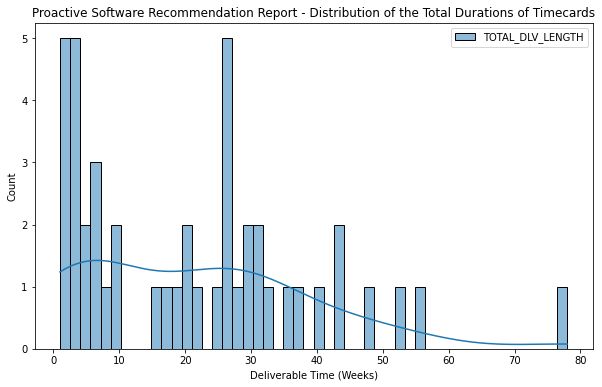

In [132]:
# Scratch work
density_plot(dlv_week_lengths, "Proactive Software Recommendation Report")

In [203]:
# Scratch work
deliverable_thinned_table(project_week_lengths, "Proactive Software Recommendation Report", 3)

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
5020,882232,Proactive Software Recommendation Report,3,3
9128,885636,Proactive Software Recommendation Report,2,3
14298,890464,Proactive Software Recommendation Report,3,3


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([1.42001299, 0.18558457, 0.34212154, 0.15017671]))

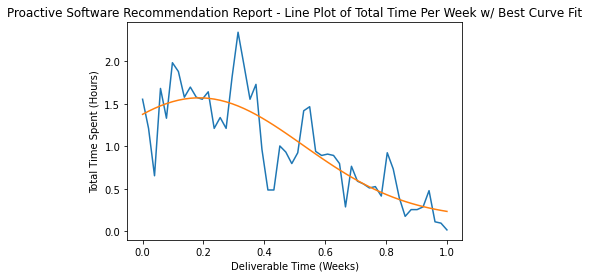

In [358]:
gaussian_fit_normalized("Proactive Software Recommendation Report", "897139")

(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([1.28184856, 0.23025732, 0.10337328, 0.67994027]))

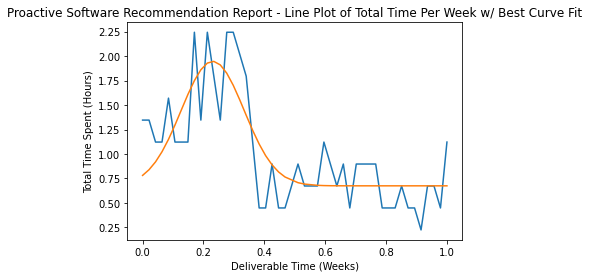

In [316]:
gaussian_fit_normalized("Proactive Software Recommendation Report", "880002")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([ 389.86442722,   -4.80923547,   40.11773469, -385.45851943]))

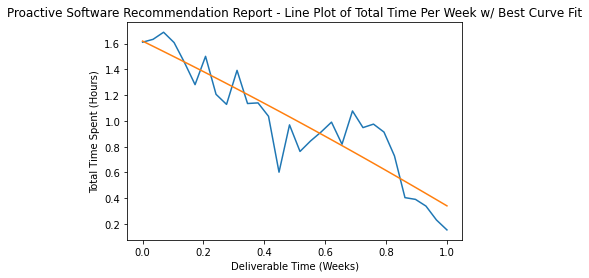

In [317]:
gaussian_fit_normalized("Proactive Software Recommendation Report", "889890")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([ 4.17083971e+07, -2.54774398e+00,  4.32148955e-01,  9.04715471e-01]))

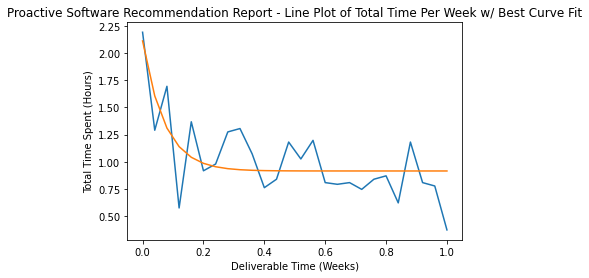

In [361]:
gaussian_fit_normalized("Proactive Software Recommendation Report", "880864")

In [380]:
# Scratch work
time_entries[(time_entries["SEGMENT1"] == "880864") & (time_entries["DELIVERABLE"] == "Proactive Software Recommendation Report") & (time_entries["WEEK_SEQUENCE"] == 1)]["WEEK_END_DATE"]

184794    2018-06-16
230225    2018-02-17
339357    2018-01-20
378005    2018-03-17
506675    2018-03-03
559528    2018-01-06
691054    2018-01-20
748508    2018-03-03
962965    2018-01-06
1010589   2018-06-09
1019902   2018-01-06
1040158   2018-01-13
Name: WEEK_END_DATE, dtype: datetime64[ns]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([ 2.51578529e+03, -1.31288076e+00,  3.78307927e-01,  2.24087313e-01]))

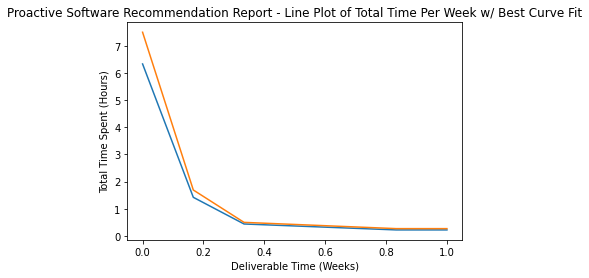

In [383]:
gaussian_fit_normalized("Proactive Software Recommendation Report", "885270")

In [ ]:
# Went through all the projects with "Proactive Software Recommendation Report" as a deliverable and took note of the curve trends generated and the total length of the deliverable

# Chosen deliv: "Proactive Software Recommendation Report"
# Project ID: 889890 (30 length), 881884 (20 length), 885536 (20 length), 900170 (10 length), 883206 (5 length), 
# 883419 (5 length), 878245 (78 length) NICE, 897139 (52 length), 880002 (48 length), 873023 (26 length), 
# 880864 (26 length), 879168 (25 length), 909362 (22 length), 889655 (17 length), 899317 (9 length), 885270 (7 length)
# 897760 (6 length), 897957 (6 length), 883047 (4 length), 898217 (4 length), 882232 (3 length)


43.11224489795918
A exp[-0.5((x-mu) / sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
0.4152902782927966 0.607180201354607 0.13792613600236486 0.8550762865436702


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([0.41529028, 0.6071802 , 0.13792614, 0.85507629]))

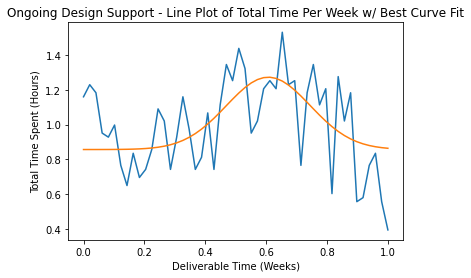

In [275]:
gaussian_fit_normalized("Ongoing Design Support", "902690")

In [84]:
# Scratch work
deliverable_thinned_table(project_week_lengths, "Proactive Software Recommendation Report", 20)

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
4773,881884,Proactive Software Recommendation Report,20,20
9051,885536,Proactive Software Recommendation Report,20,20


29.61842105263158
A exp[-0.5((x-mu) / sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
12381201.10230156 -6.518828433440838 1.1780084061526754 0.4420975929148484


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([ 1.23812011e+07, -6.51882843e+00,  1.17800841e+00,  4.42097593e-01]))

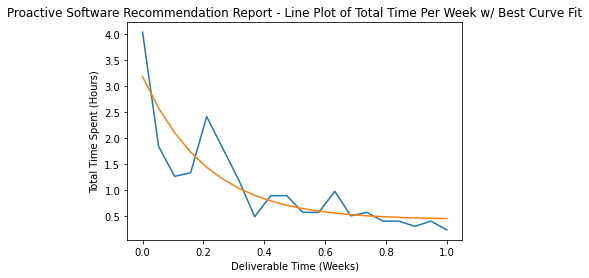

In [274]:
gaussian_fit_normalized("Proactive Software Recommendation Report", "881884")

1.816326530612245
A exp[-0.5((x-mu) / sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
-2057.0192667078263 0.71604862361449 37.886710703777425 2057.933253975457


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([-2.05701927e+03,  7.16048624e-01, -3.78867107e+01,  2.05793325e+03]))

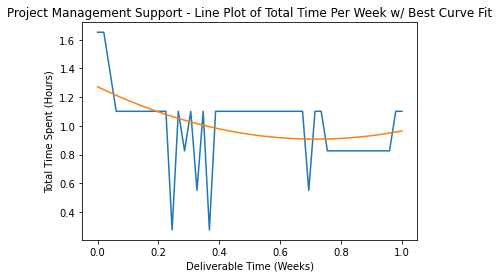

In [273]:
gaussian_fit_normalized("Project Management Support", "900030")

24.003508771929823
A exp[-0.5((x-mu) / sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
-364.191699018143 0.7244934559475964 24.868190816880105 365.16150136332124


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([-364.19169902,    0.72449346,  -24.86819082,  365.16150136]))

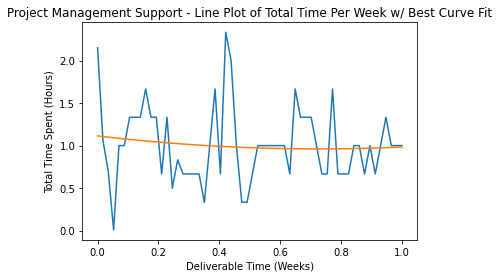

In [272]:
gaussian_fit_normalized("Project Management Support", "851193")

In [89]:
# Scratch work
deliverable_thinned_table(project_week_lengths, "Ongoing Design Support", 50)

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
15702,891184,Ongoing Design Support,47,50
17159,892557,Ongoing Design Support,42,50
19807,894314,Ongoing Design Support,50,50
22696,896732,Ongoing Design Support,50,50
28391,902690,Ongoing Design Support,50,50
28817,903284,Ongoing Design Support,47,50
34291,907746,Ongoing Design Support,49,50
35663,909175,Ongoing Design Support,40,50
42534,915901,Ongoing Design Support,49,50
44510,918085,Ongoing Design Support,48,50


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([0.41529028, 0.6071802 , 0.13792614, 0.85507629]))

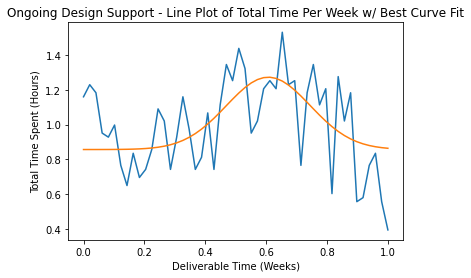

In [360]:
gaussian_fit_normalized("Ongoing Design Support", "902690")

52.12755102040816
A exp[-0.5((x-mu) / sigma)^2] + k 
Parent Coefficients:
1.000, 0.200, 0.300, 0.625
Fit Coefficients:
1.9461160895988208 0.15813990413119552 0.33250683524901803 -0.07533837909203754


(<function __main__.gaussian_fit_normalized.<locals>.<lambda>(p, x)>,
 0.0,
 1.0,
 array([ 1.94611609,  0.1581399 ,  0.33250684, -0.07533838]))

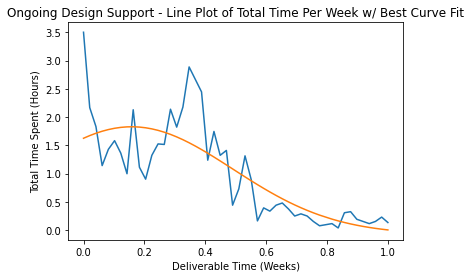

In [113]:
gaussian_fit_normalized("Ongoing Design Support", "915901")

In [394]:
# Scratch work
chosen_dlv = "Configuration Best Practices Report"

In [395]:
# Scratch work
deliverable_thinned_table(project_week_lengths, chosen_dlv, 2)

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
3301,880076,Configuration Best Practices Report,2,2
13943,890023,Configuration Best Practices Report,2,2
17461,892927,Configuration Best Practices Report,2,2
22414,896420,Configuration Best Practices Report,2,2


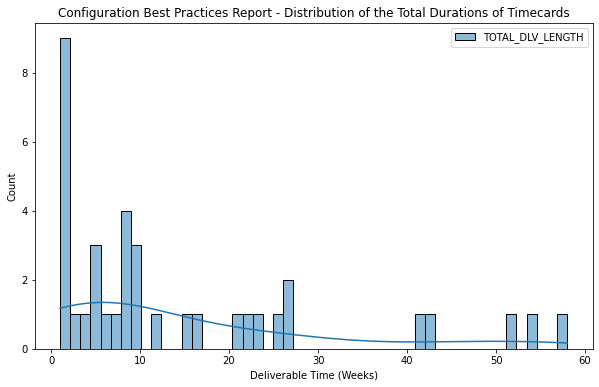

In [396]:
# Scratch work
density_plot(dlv_week_lengths, chosen_dlv)

In [397]:
# Scratch work

#gaussian_fit_modified(chosen_dlv, "880076")
#Chosen deliv: "Travel Time"
#Project ID: "886634", "893809"

#Chosen deliv: "Ongoing Flexible Support"
#Project ID: "901657"

#Chosen deliv: "Presales: Cust Mtgs"
#Project ID: "885187"

#Chosen deliv: "Configuration Best Practices Report"
#Project ID: "880076"
#TypeError: Improper input: N=4 must not exceed M=2

PART 4
1) Get a list of projects with deliverable "Proactive Software Recommendation Report" that have a total length greater than 3 weeks <br>
2) Use itertools.combinations to calculate pairs of projects with "Proactive Software Recommendation Report" <br>
3) Create a function that computes pairwise combinations of projects with a certain deliverable and calculate the kld between both curves

In [ ]:
# ----------------------------------------- Task #1 (Creating Table) ---------------------------------------------

In [335]:
# Getting the valid project ID's for projects with "Proactive Software Recommendation Report" as a deliverable
pro_software_rec_report = deliverable_thinned(project_week_lengths, "Proactive Software Recommendation Report")[deliverable_thinned(project_week_lengths, "Proactive Software Recommendation Report")["TOTAL_DLV_LENGTH"] > 3]
pro_software_rec_report

,SEGMENT1,DELIVERABLE,UNIQUE_WEEK_ENTRIES,TOTAL_DLV_LENGTH
1120,873023,Proactive Software Recommendation Report,24,26
2438,878245,Proactive Software Recommendation Report,64,78
2900,879168,Proactive Software Recommendation Report,25,25
3260,880002,Proactive Software Recommendation Report,45,48
4003,880864,Proactive Software Recommendation Report,26,26
4773,881884,Proactive Software Recommendation Report,20,20
5577,883047,Proactive Software Recommendation Report,4,4
5688,883206,Proactive Software Recommendation Report,5,5
5866,883419,Proactive Software Recommendation Report,5,5
8104,885270,Proactive Software Recommendation Report,5,7


In [336]:
# Saving the project ID values
pro_software_rec_report_ids = pro_software_rec_report["SEGMENT1"]
pro_software_rec_report_ids

1120     873023
2438     878245
2900     879168
3260     880002
4003     880864
4773     881884
5577     883047
5688     883206
5866     883419
8104     885270
9051     885536
13210    889655
13380    889890
22974    897139
23871    897760
24034    897957
24200    898217
25313    899317
25935    900170
35842    909362
Name: SEGMENT1, dtype: object

In [ ]:
# ---------------------------------------- Task #2 (Pairwise Combinations) ----------------------------------------

In [284]:
# Calculating pairwise combinations of project IDs with "Proactive Software Recommendation Report" as a deliverable
import itertools
pro_software_rec_reports_combinations = list(itertools.combinations(pro_software_rec_report_ids, 2))
pro_software_rec_reports_combinations

[('873023', '878245'),
 ('873023', '879168'),
 ('873023', '880002'),
 ('873023', '880864'),
 ('873023', '881884'),
 ('873023', '883047'),
 ('873023', '883206'),
 ('873023', '883419'),
 ('873023', '885270'),
 ('873023', '885536'),
 ('873023', '889655'),
 ('873023', '889890'),
 ('873023', '897139'),
 ('873023', '897760'),
 ('873023', '897957'),
 ('873023', '898217'),
 ('873023', '899317'),
 ('873023', '900170'),
 ('873023', '909362'),
 ('878245', '879168'),
 ('878245', '880002'),
 ('878245', '880864'),
 ('878245', '881884'),
 ('878245', '883047'),
 ('878245', '883206'),
 ('878245', '883419'),
 ('878245', '885270'),
 ('878245', '885536'),
 ('878245', '889655'),
 ('878245', '889890'),
 ('878245', '897139'),
 ('878245', '897760'),
 ('878245', '897957'),
 ('878245', '898217'),
 ('878245', '899317'),
 ('878245', '900170'),
 ('878245', '909362'),
 ('879168', '880002'),
 ('879168', '880864'),
 ('879168', '881884'),
 ('879168', '883047'),
 ('879168', '883206'),
 ('879168', '883419'),
 ('879168',

In [285]:
len(pro_software_rec_reports_combinations)

190

In [268]:
# Calculating the KLD values for the pairwise combinations of projects with "Proactive Software Recommendation Report" as a deliverable
def get_symmetric_kld_combo(list):
    for pair in list:
        print(pair[0] + " and " + pair[1] + ":", get_symmetric_kld(pair[0], pair[1], "Proactive Software Recommendation Report"))

In [ ]:
# -------------------------------------- Task #3 (Creating KLD Function) ------------------------------------------

In [408]:
# Computes and prints out the pairwise KLD values for a specific deliverable given the proper dataset and deliverable name
def get_symmetric_kld_combo_modified(data, deliverable):
    filtered_table = deliverable_thinned(data, deliverable)[deliverable_thinned(data, deliverable)["TOTAL_DLV_LENGTH"] > 3]
    id_list = filtered_table["SEGMENT1"]
    pairwise_combinations = list(itertools.combinations(id_list, 2))
    for pair in pairwise_combinations:
        print(pair[0] + " and " + pair[1] + ":", get_symmetric_kld(pair[0], pair[1], deliverable))

In [406]:
# Check to see if all project ID combinations' KLD values are being calculated for "Ongoing Design Support"
x = deliverable_thinned(project_week_lengths, "Ongoing Design Support")[deliverable_thinned(project_week_lengths, "Ongoing Design Support")["TOTAL_DLV_LENGTH"] > 3]["SEGMENT1"]
x

169      853472
266      857114
368      863029
467      865198
822      869649
          ...  
55826    945150
55838    945330
55891    946329
55972    948957
55995    950653
Name: SEGMENT1, Length: 794, dtype: object

In [345]:
# Check to see if all project ID combinations' KLD values are being calculated for "Ongoing Design Support"
ids = list(itertools.combinations(x, 2))
ids

[('853472', '857114'),
 ('853472', '863029'),
 ('853472', '865198'),
 ('853472', '869649'),
 ('853472', '869844'),
 ('853472', '871147'),
 ('853472', '871627'),
 ('853472', '872460'),
 ('853472', '873023'),
 ('853472', '875779'),
 ('853472', '875920'),
 ('853472', '875921'),
 ('853472', '875922'),
 ('853472', '875928'),
 ('853472', '875929'),
 ('853472', '875930'),
 ('853472', '875931'),
 ('853472', '875932'),
 ('853472', '875933'),
 ('853472', '875934'),
 ('853472', '875955'),
 ('853472', '875985'),
 ('853472', '876861'),
 ('853472', '876939'),
 ('853472', '877022'),
 ('853472', '877958'),
 ('853472', '877990'),
 ('853472', '878128'),
 ('853472', '878131'),
 ('853472', '878183'),
 ('853472', '878245'),
 ('853472', '878520'),
 ('853472', '878783'),
 ('853472', '878810'),
 ('853472', '878950'),
 ('853472', '879031'),
 ('853472', '879064'),
 ('853472', '879094'),
 ('853472', '879104'),
 ('853472', '879157'),
 ('853472', '879168'),
 ('853472', '879229'),
 ('853472', '879397'),
 ('853472',

In [409]:
# Check to see if all project ID combinations' KLD values are being calculated for "Ongoing Design Support"
get_symmetric_kld_combo_modified(project_week_lengths, "Ongoing Design Support")

853472 and 857114: 2.1083599399850135
853472 and 863029: 0.6130181714518814
853472 and 865198: 1.0544808332179572
853472 and 869649: 0.479994509077552
853472 and 869844: 1.4874208587380888
853472 and 871147: 0.8328582812037997
853472 and 871627: 0.3269692532604488
853472 and 872460: 0.2788703042450953


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


853472 and 873023: 0.1742669572602069


KeyboardInterrupt: 

In [410]:
# Computes all KLD values for projects with "Proactive Software Recommendation Report" as a deliverable
get_symmetric_kld_combo_modified(project_week_lengths, "Proactive Software Recommendation Report")

873023 and 878245: 0.5504251021726867
873023 and 879168: 0.012419455105225645
873023 and 880002: 0.1249149040129991


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


873023 and 880864: 0.07870689831231636
873023 and 881884: 0.05417802660177283
873023 and 883047: 0.19288002188734965


KeyboardInterrupt: 